<a href="https://www.kaggle.com/code/davidcoxon/comprehensive-visual-analysis-2023-playground-3?scriptVersionId=127254401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About the competition

This Notebook relates to the third in the 2023 Playground Series, the playgroud series is a design for beginner to get used to work with different types of data. There are no Kaggle competition points awarded and the competition does not count towards kaggle tiers.

This is a categorisation problem, using a dataset with 64 binary features. There is relatively little scope for visualising the data or performing data engineering, so this is going to be more about modeling. 

# About the data

The dataset for this competition (both train and test) were generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. 
Feature distributions are close to, but not exactly the same, as the original.

The dataset contains, all symptoms and Prognosis associated with 11 Vector Borne Diseases.

• 66 columns.
• first column is the disease ID, and the last is the prognosis.
• 64 of the colummns contain binary data, each relates to a possible symptom of disease and whether its present or not. 

• 707 rows of training data
• 303 of test data.

# About the notebook

The notebook was created by @davidcoxon in mid April, 2023. 

This notebook aims to perform visual data exploration of the data within the dataset to get some insights into the data. There isn't a great deal of scope for visualising the data, so i am going to focus on proving a couple of different approaches to visualizing the different areas of data, and comparing the different results in terms of impact, clarity and complexity of the code to produce it and time to run. It would be great to get some feedback in the comments on what works and what doesn't for the different approaches.   

Where inspation (or code) has come from other peoples notebooks, the source will be commented out in the code, sources will also be creditted at the bottom of the notebook. If you like this notebook please upvote it, and where appropriate upvote the notebooks creditted at the bottom. Feel free to clone this notebook, or to copy code snippets but please credit in your notebook if you use it.

# Get libraries and set parameters

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math #maths
import matplotlib.pyplot as plt #plotting
import matplotlib.ticker as mticker
import seaborn as sns #plotting
import datetime as dt #datetime
import datetime #datetime
import warnings #system config
import os #system config
from math import pi

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import shap

print('Libraries loaded')

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']
blues=['lightcyan','lightblue','lightskyblue','skyblue','cyan','deepskyblue','dodgerblue','steelblue','blue','mediumblue','navy']

print('Parameters set')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Libraries loaded
Parameters set
/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


# Get data

In [2]:
# import all files in Data folder and read into dataframes
dataframes=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file=filename.split('.')
        file=((file[0]+"_df"))
        if file !="_df":
            filepath=os.path.join(dirname,filename)
            df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
            
print('Data imported')

sample_submission_df (303, 2)
train_df (707, 66)
test_df (303, 65)
Data imported


# Examine the data type

In [3]:
print(train_df.info())
#print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

# First look at test and training data

The following 2 sets of graphs show the distribution of different within the training data set. 

The second set of graphs included slightly more detail, but essentially the difference is in the styling of the results. While the second graphs look a little more interesting the use a bit more code and required more resource/time to run. 

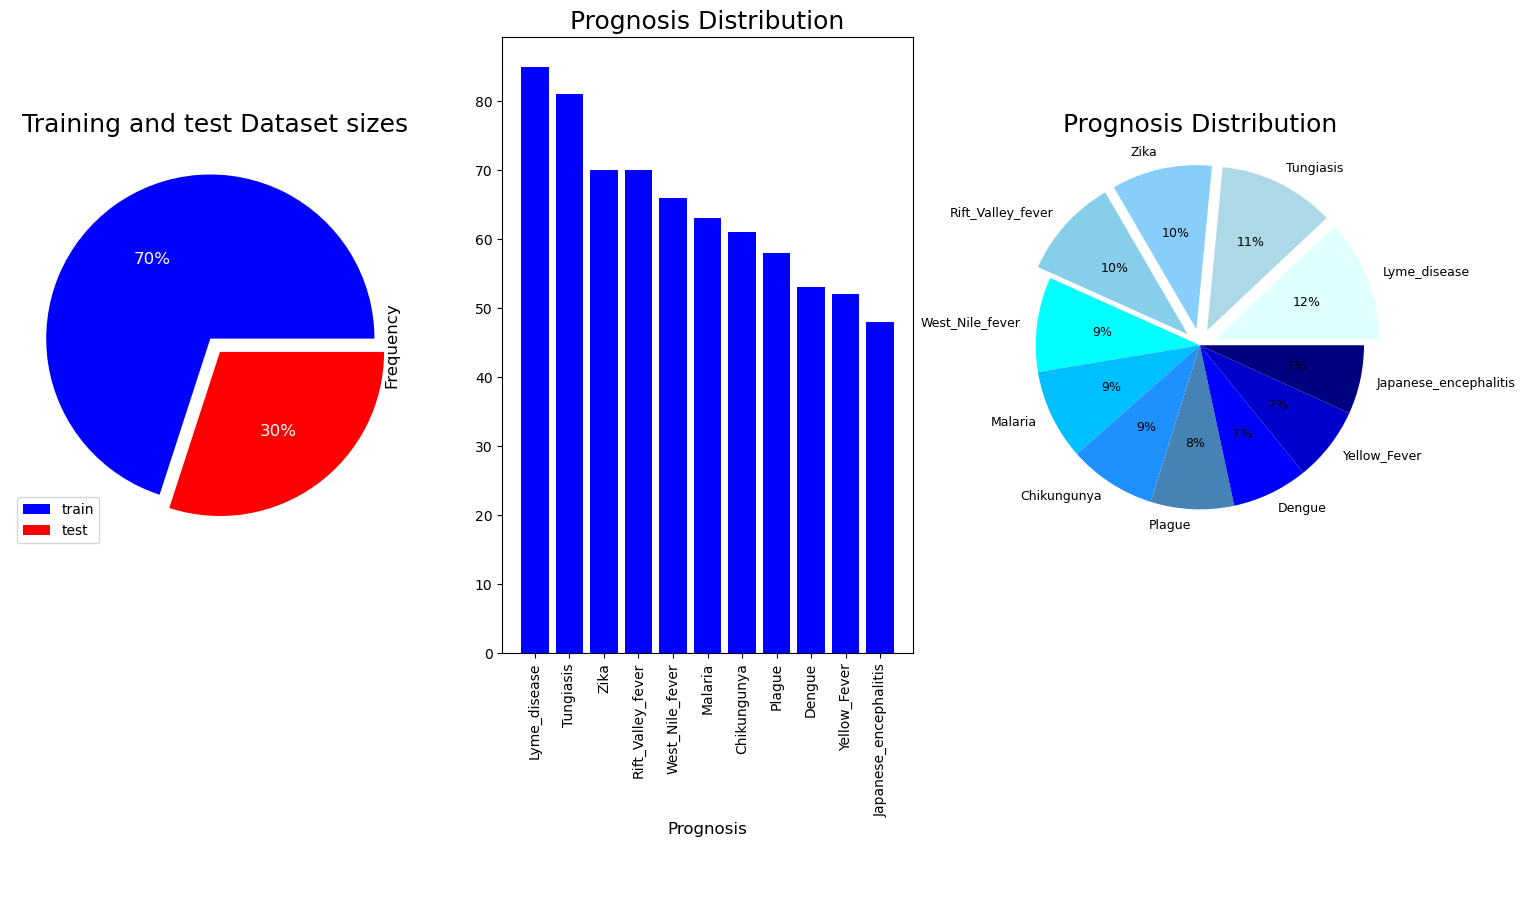

CPU times: user 856 ms, sys: 265 ms, total: 1.12 s
Wall time: 769 ms


In [4]:
%%time

# Create grid
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(133)

# plot the distibution of prognosis pie chart
plt.subplot(1, 3, 1) 
plt.pie([len(train_df), len(test_df)], 
        colors=['blue', 'red'],
        textprops={'fontsize': 12, 'color' : 'white',},
        autopct='%.0f%%',
        explode=[0.05,0.05],
       labels=['train', 'test'])
plt.legend(loc='best')

        
plt.title(f'Training and test Dataset sizes', ha='center', fontsize=18)

# plot the number size of training versus test dataset
plt.subplot(1, 3, 2) 
plt.bar(pd.Series(range(1,12)),train_df['prognosis'].value_counts(),color='b')
plt.xticks(np.arange(1,12),train_df['prognosis'].unique(),rotation=90)
plt.xlabel(f'Prognosis\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.title(f'Prognosis Distribution', ha='center', fontsize=18)

# plot dostribution of prognosis in dataset
explode = (0.1, 0.1, 0.1,0.1,0,0,0,0,0,0,0)
plt.subplot(1, 3, 3)
plt.pie(train_df['prognosis'].value_counts(),textprops={'fontsize': 9, 'color' : 'black',},explode=explode,colors=blues,autopct='%.0f%%',labels=train_df['prognosis'].unique())
plt.title(f'Prognosis Distribution', ha='center', fontsize=18)
#plt.legend(loc='lower center')

plt.show()

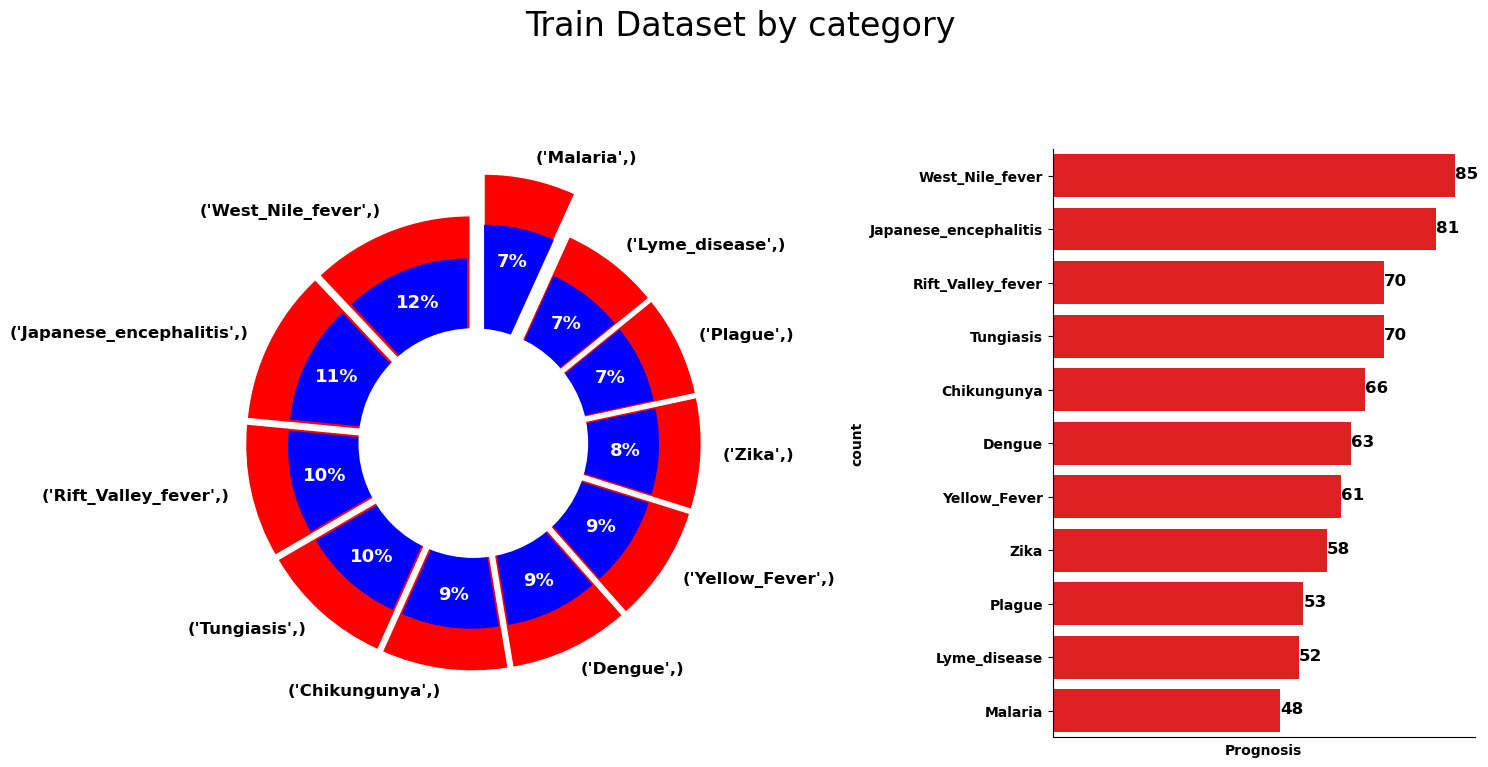

CPU times: user 1.18 s, sys: 307 ms, total: 1.49 s
Wall time: 1 s


In [5]:
%%time

# This is a very nice visual from @sergiosaharovskiy 

def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    """Draws the pie and count plots for categorical variables.
    
    Args:
        df: train or test dataframes
        col_list: a list of the selected categorical variables.
        title_name: 'Train' or 'Test' (default 'Train')
        
    Returns:
        subplots of size (len(col_list), 2)
    """
    f, ax = plt.subplots(len(col_list), 2, figsize=(15, 8))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts()
    N = len(s1)
    outer_sizes = s1
    inner_sizes = s1/N
    outer_colors = "r" * N
    inner_colors = "b" * N

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    order = s1.index.get_level_values(0).tolist()
    sns.countplot(
        y=df[col_list[0]], ax=ax[1],
       orient='horizontal',  order=order, color='r'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

#     barchart  
    for i, v in enumerate(s1):
        ax[1].text(v, i+0.05, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel('Prognosis', fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset by category', fontsize=24)
    plt.tight_layout()    
#     plt.savefig('Graphs/plot_count.png')
    plt.show()
plot_count(train_df, ['prognosis'], 'Train')

# Compare training and test feature distributions

The following 2 sets of visualisations will look at the distribution of features within the dataset. Each feature is a binary feature, and there are 2 reasons to look at the this, the first is to see in the test and training database are consistent, the second is to get an idea of how many features there are and how unique these may be. 

The first is a quite simple visual, its pretty easy to see how many features there are, and how similar the 2 datasets are.The second visualization looks far more complex its harder to get an idea of the overall picture, but its much easier to see how well the test and training distributions compare for each individual feature and to see how the comparison between case with and without that symptom. 

There isn't much difference in the amount of code needed to create each of the visuals, but the second set of visuals take 3 times longer to execute.

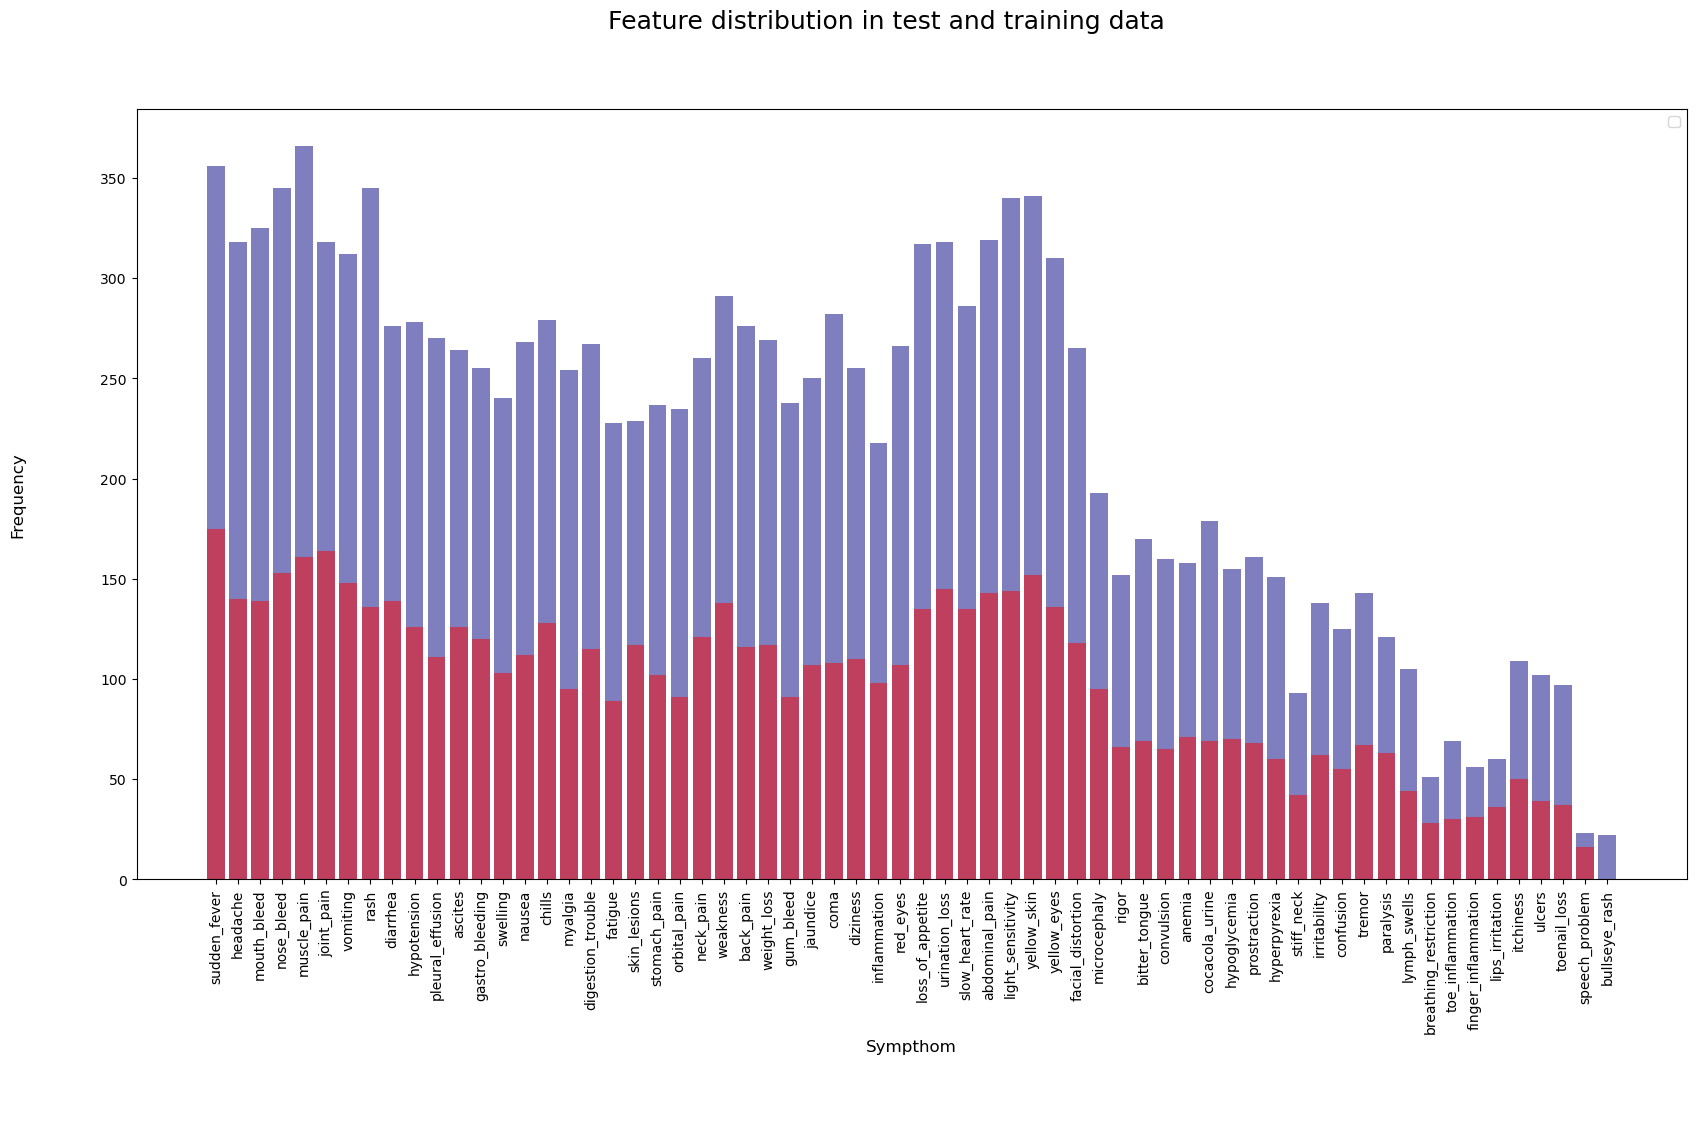

CPU times: user 1.36 s, sys: 241 ms, total: 1.6 s
Wall time: 1.36 s


In [6]:
%%time

# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])
sum_test_df=((test_df).sum(axis=0)[1:-1])

# plot the sum of each feature
f, ax = plt.subplots(figsize=(20, 10))

plt.bar((pd.Series(range(1,len(sum_train_df)+1))),sum_train_df.values,color='navy',alpha=0.5)
plt.bar((pd.Series(range(1,len(sum_test_df)+1))),sum_test_df.values,color='red',alpha=0.5)

plt.xticks(np.arange(1,len(sum_train_df)+1),sum_train_df.index.tolist(),rotation=90)
plt.suptitle(f'Feature distribution in test and training data', ha='center', fontsize=18)
plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.legend()
plt.show()

CPU times: user 5.75 s, sys: 362 ms, total: 6.11 s
Wall time: 5.65 s


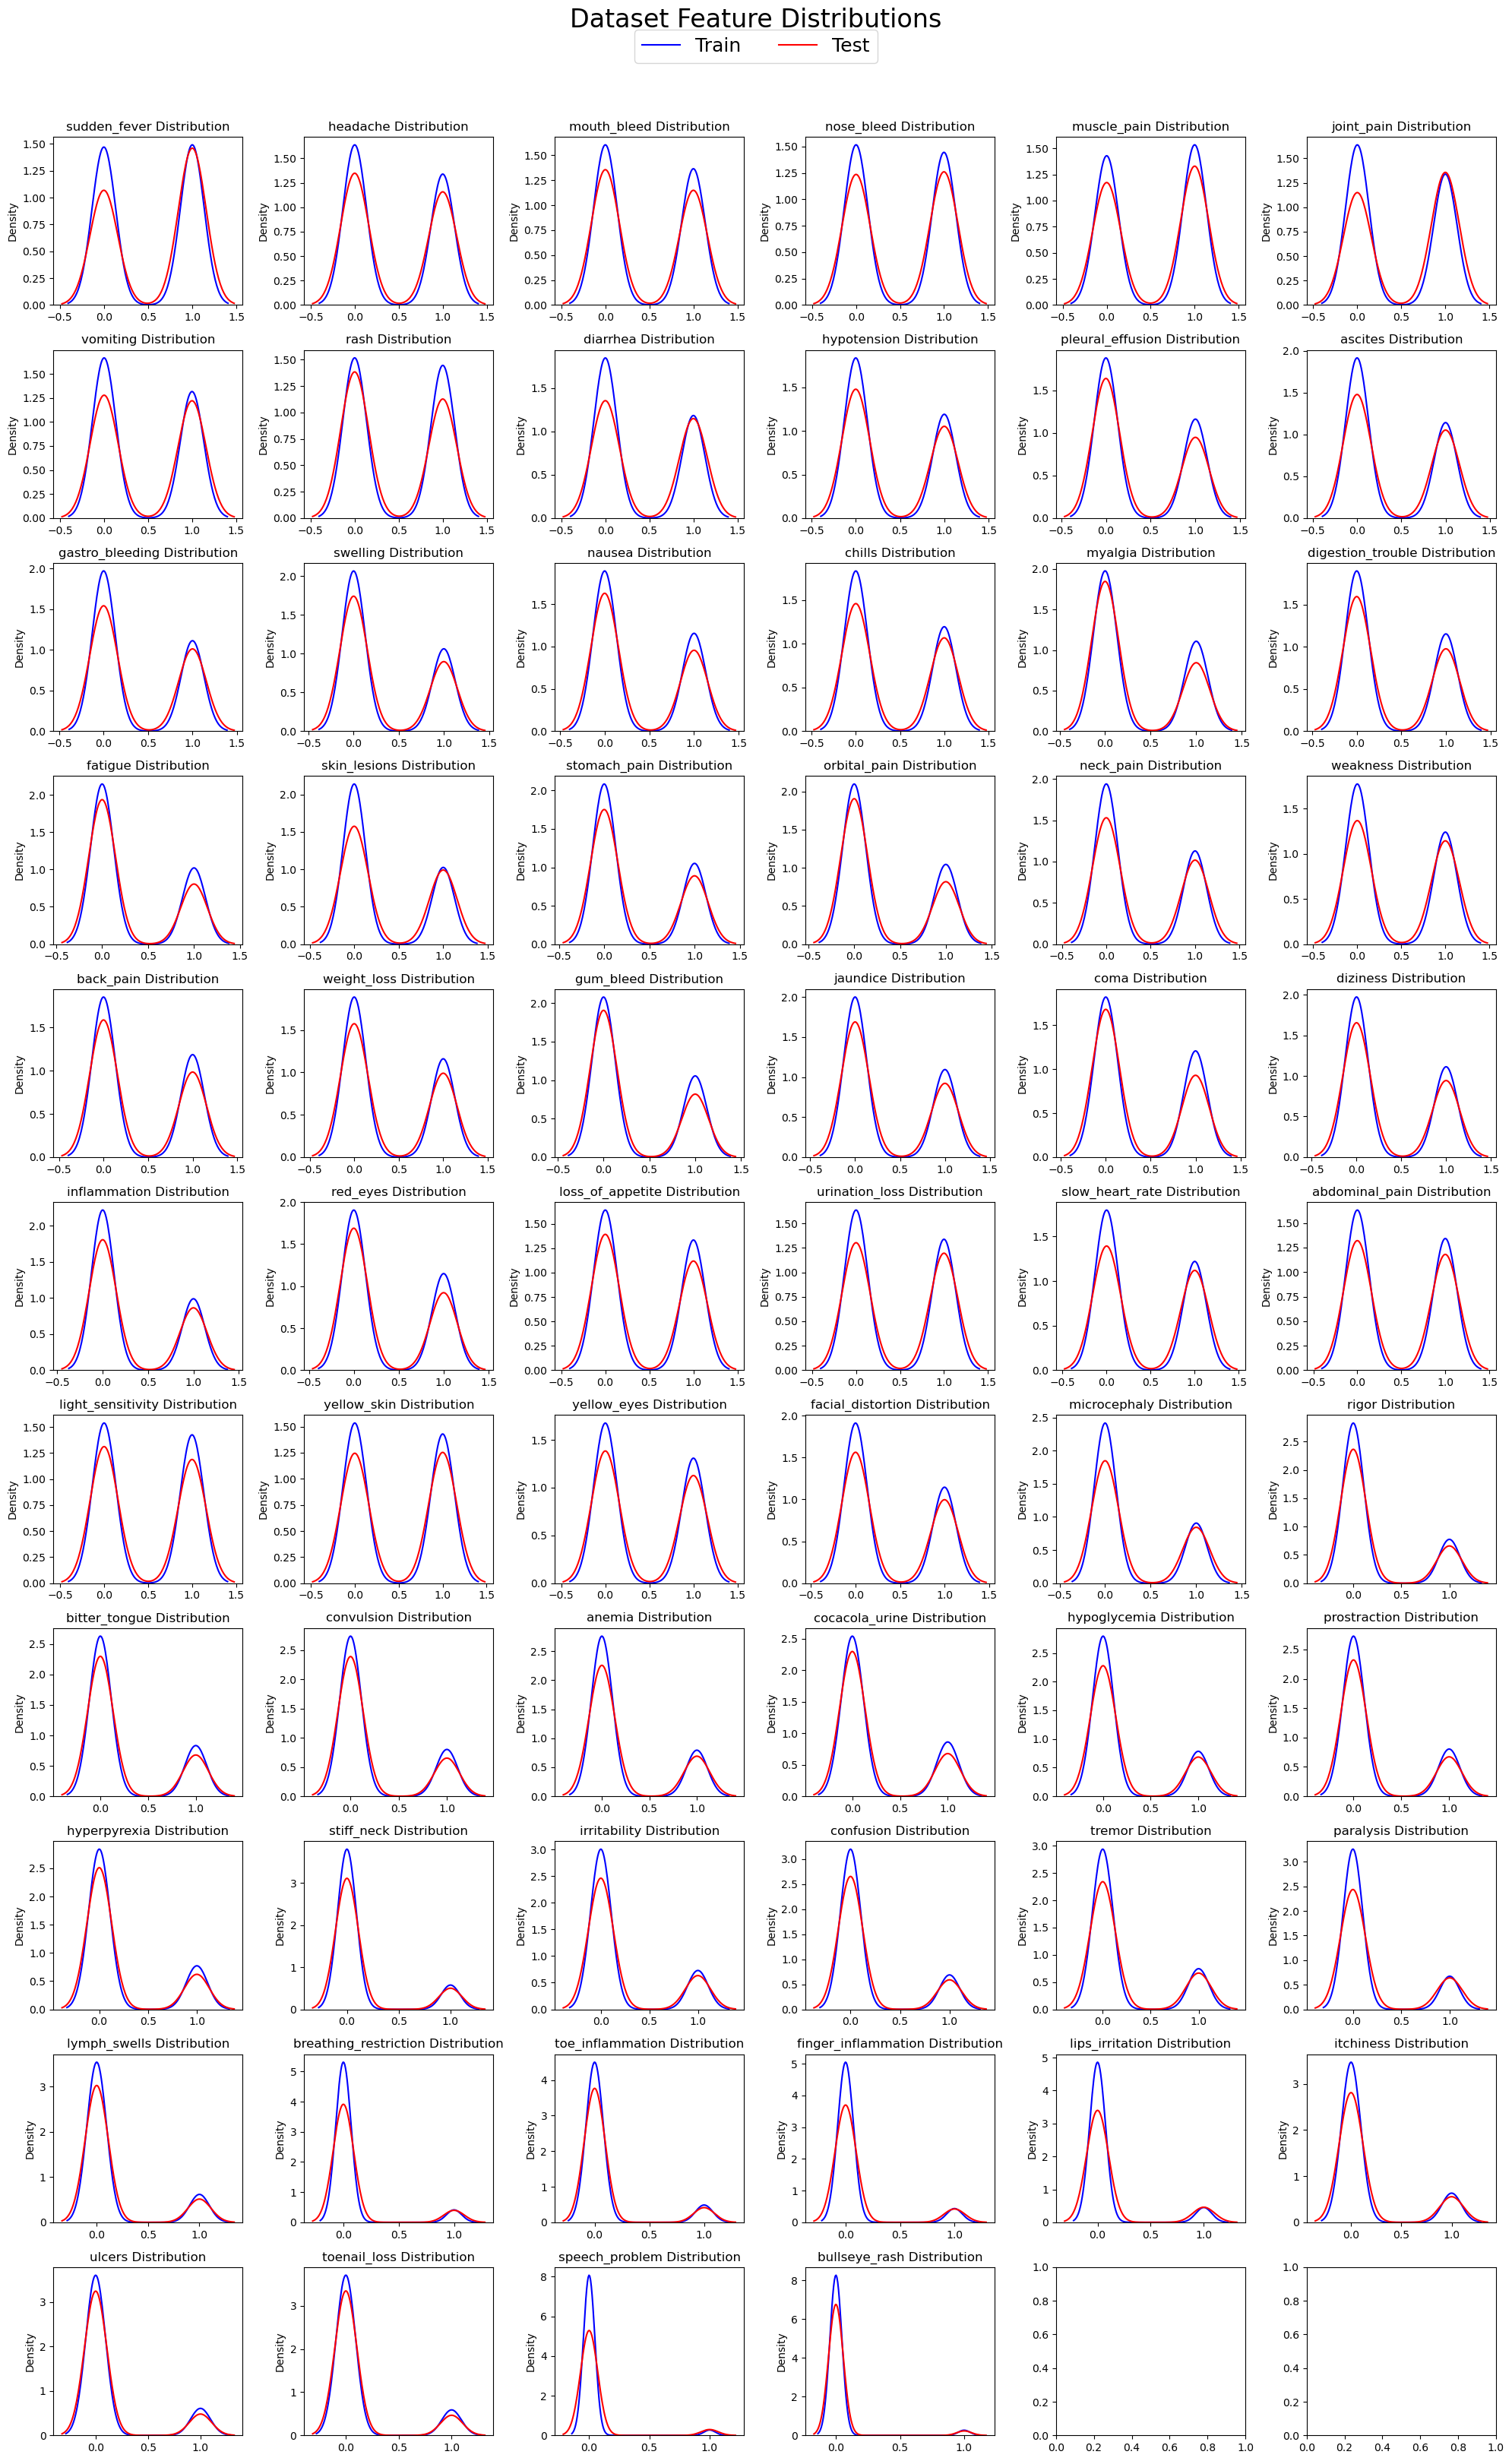

In [7]:
%%time

# kudos to @jcaliz and @sergiosaharovskiy

features = (train_df.columns)[1:-1] #select columns to be used
n_bins = 10 #set number of bins
n_cols = 6 #set number of bins
n_rows = math.ceil(len(features)/n_cols) # set number of rows
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*3))
ax = ax.flatten()

for i, column in enumerate(features):
    #plot distributions
    plot_axes = [ax[i]]
    sns.kdeplot(
        train_df[column], label='Train',
        ax=ax[i], color='b')
    
    sns.kdeplot(
        test_df[column], label='Test',
        ax=ax[i], color='r')
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

# title plot
fig.suptitle(f'Dataset Feature Distributions\n\n\n\n', ha='center', fontsize=24)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.975), fontsize=18, ncol=3)
plt.tight_layout()

## Observations on data distributions

Generally the distribution of the data in the test dataset reflects the distribution in the training dataset. There are small difference but this is likely to be because the data is a synthetic data set.

# Distribution of features by disease

The ability to classify diseases based on the symptoms will depend on how distinct each set of symptoms is to a particular disease. We can be plot the distribution of symptoms for each disease by summing the features for each different disease in the training dataset.We will need to take into account the number of cases of each individual disease in the dataset to ensure that we get comparable plots for each.

There are various ways to visualize the distribution of features. 2 visualisations, I started by looking at a line plot showing all 11 diseases on a single plot, this is useful to see how similar or different the distributions are, but it looks a little chaotic, it indicates show that many of the symptoms exist for a range of diseases, but there are a few features that are relatively unique. Another way to visualise this is to show a set of barcharts, 1 for each disease. This is a less chaotic, and makes it easier to see the different profiles of symptoms for each disease, but the labels are quite difficult to see and its difficult to see the individual symptoms without really zooming in. Another option is to look at a polar plot which perhaps gives a better idea of how the features sets vary for each disease.

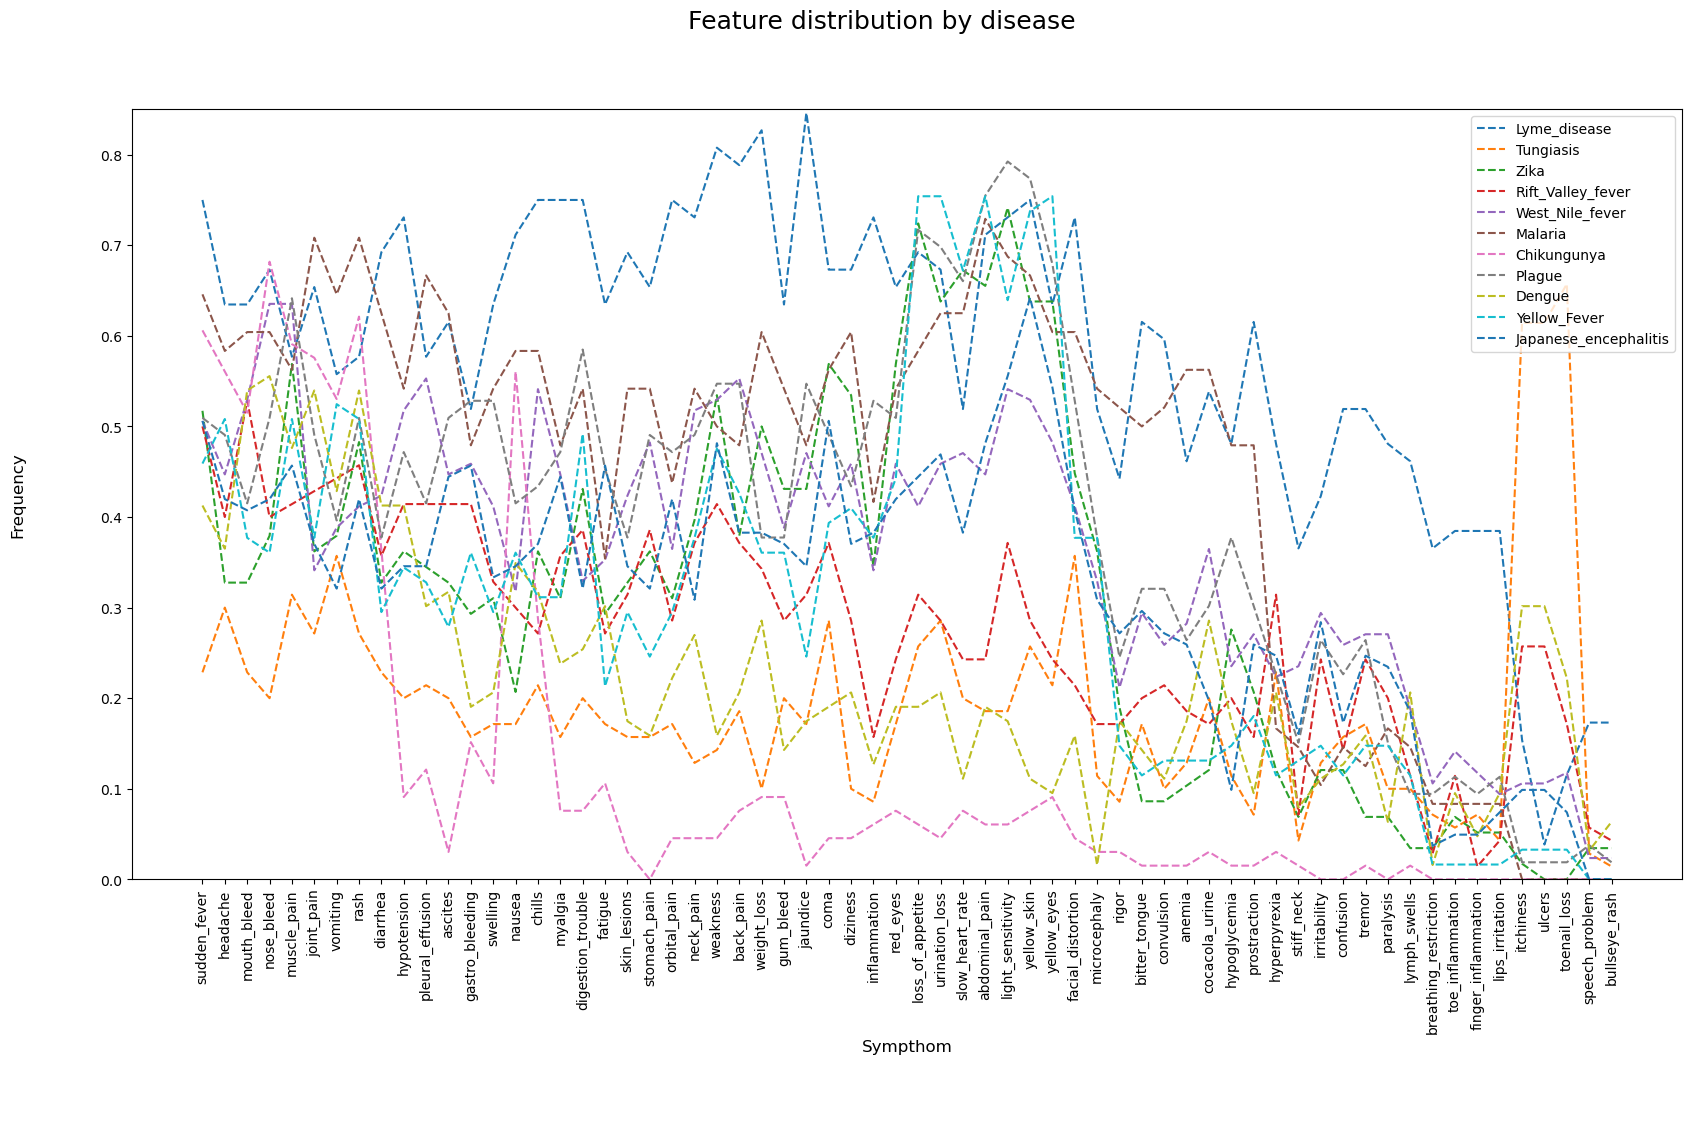

CPU times: user 1.33 s, sys: 240 ms, total: 1.57 s
Wall time: 1.33 s


In [8]:
%%time

#list diseases
diseases=train_df['prognosis'].unique()
# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])

# plot the sum of each feature for each disease
f, ax = plt.subplots(figsize=(20, 10))
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    plt.plot((pd.Series(range(1,len(sum_disease_df)+1))),sum_disease_df.values/diseasecount,alpha=1,ls='--',label=disease)
plt.xticks(np.arange(1,len(sum_disease_df)+1),sum_disease_df.index.tolist(),rotation=90)
plt.suptitle(f'Feature distribution by disease', ha='center', fontsize=18)
plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
plt.ylim(0,0.85)
plt.legend()
plt.show()

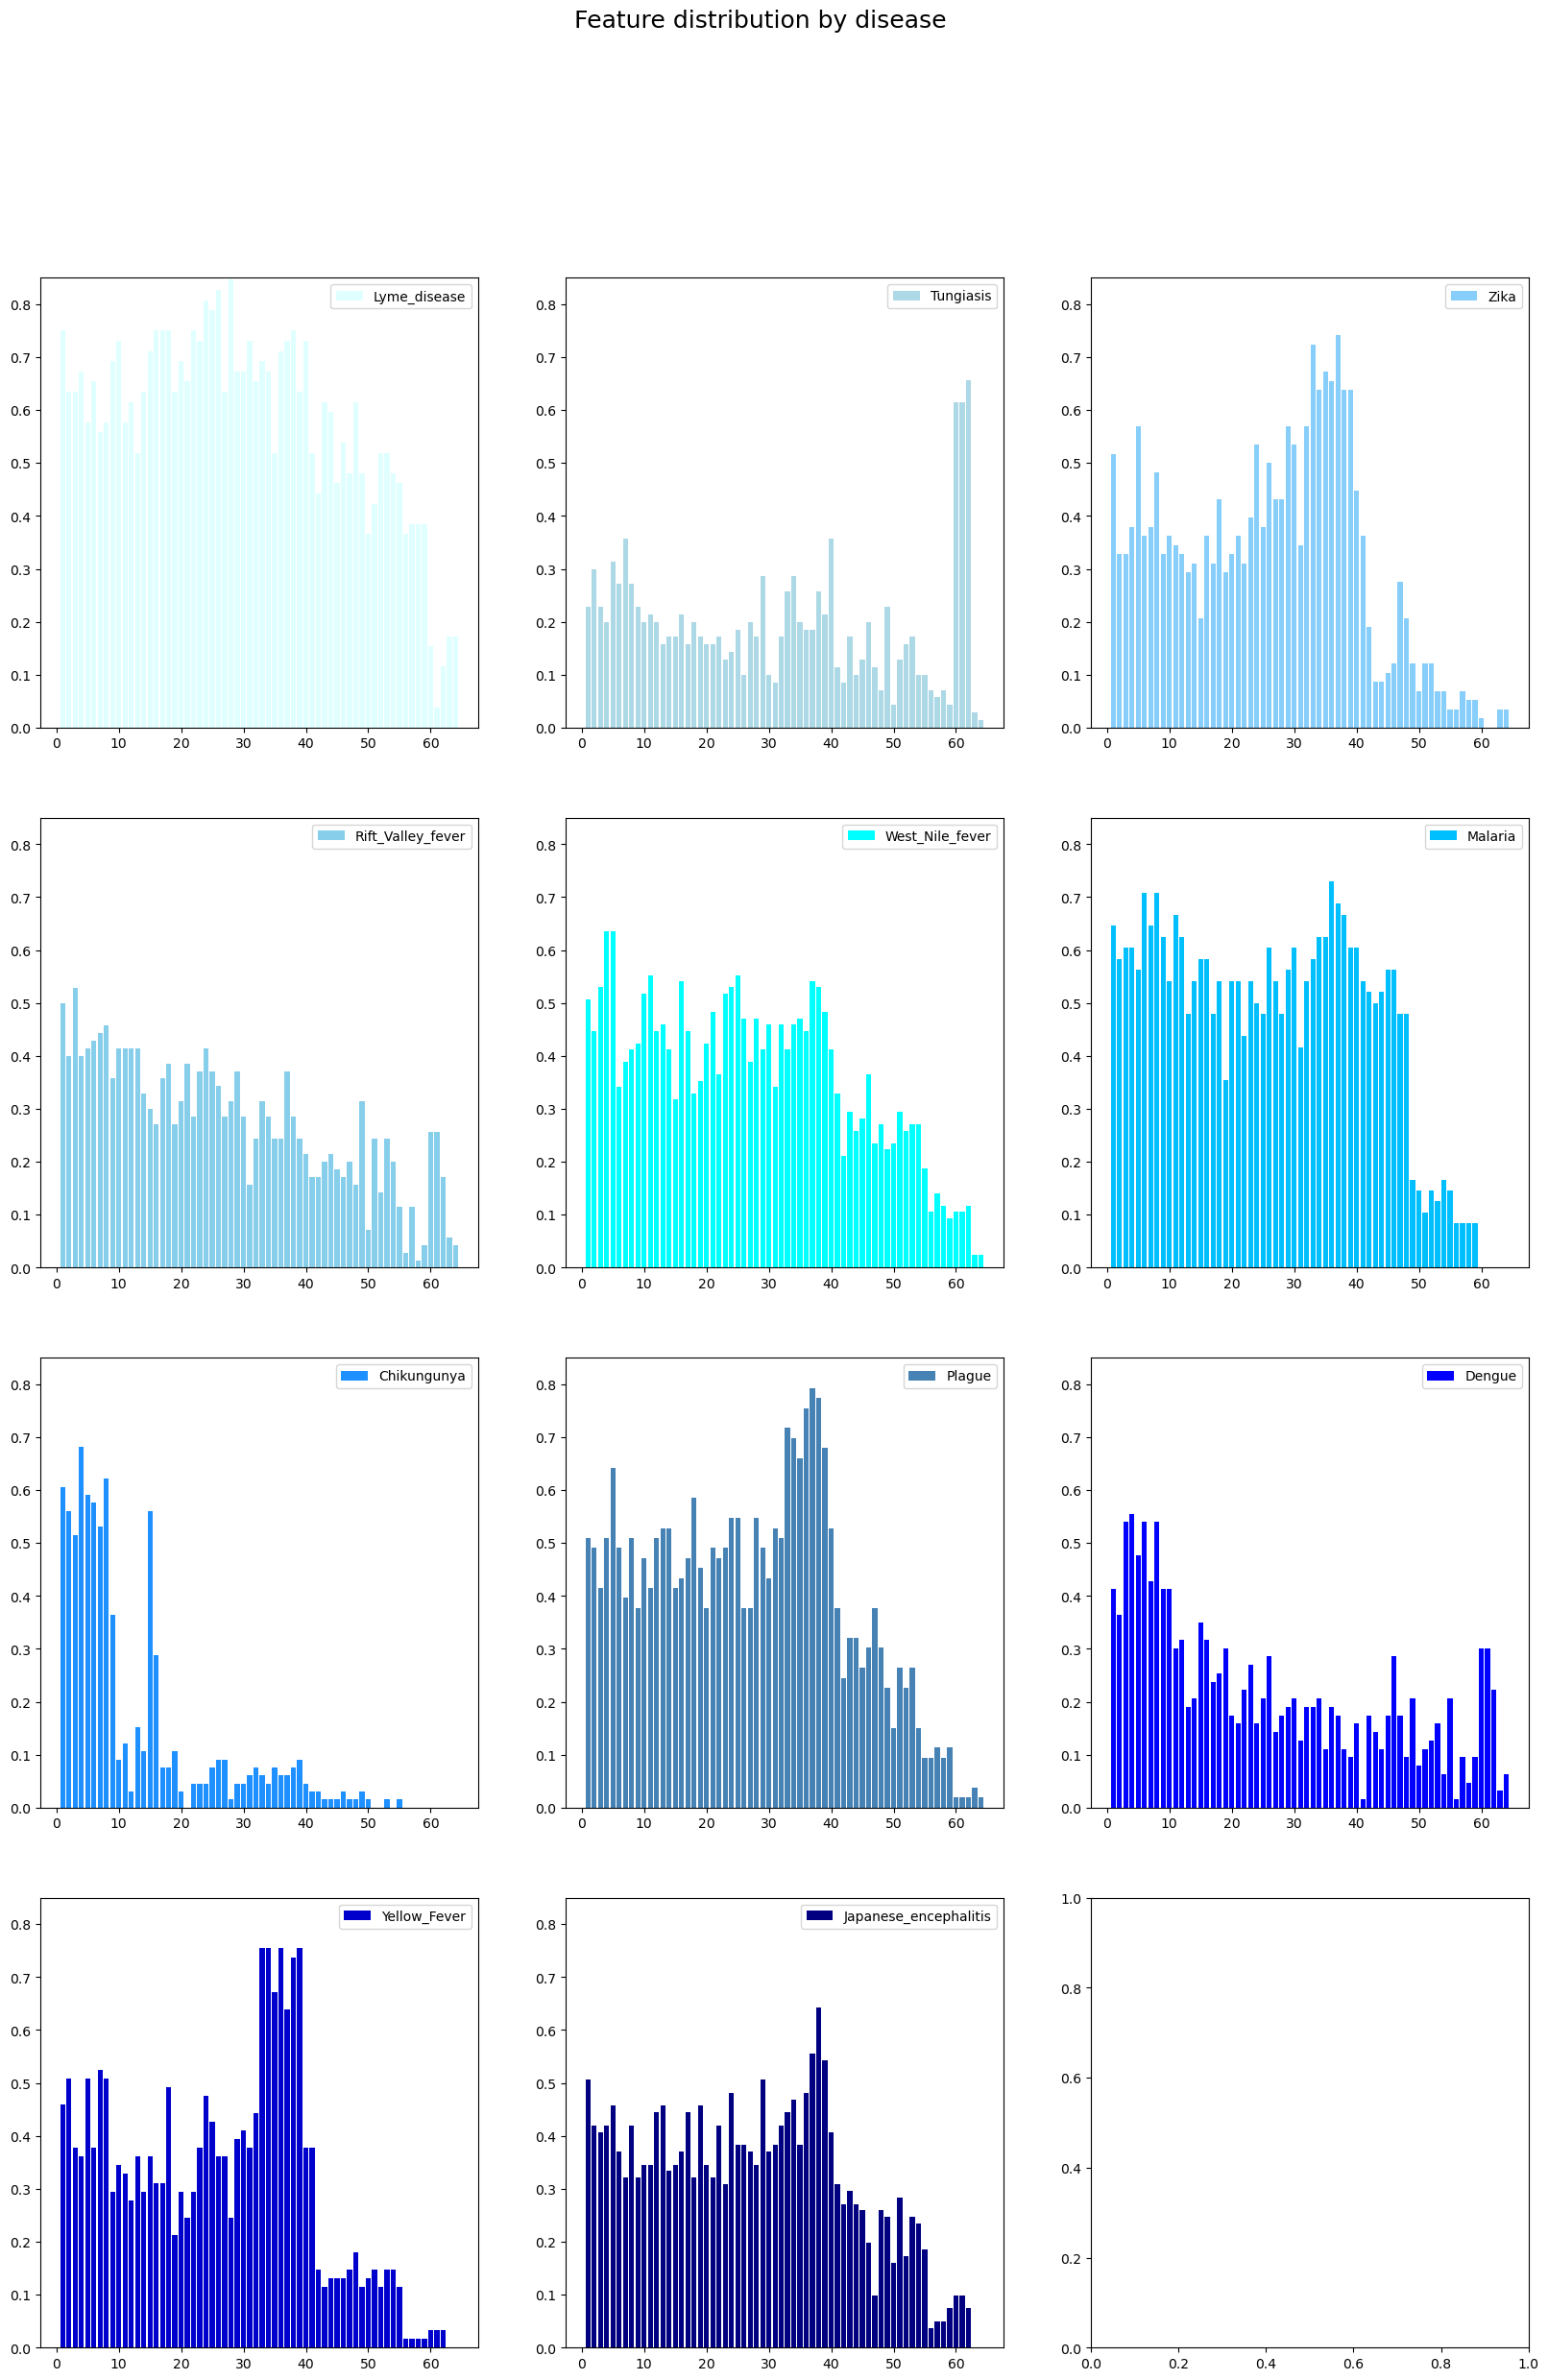

CPU times: user 4.12 s, sys: 189 ms, total: 4.31 s
Wall time: 4.07 s


In [9]:
%%time

#list diseases
diseases=train_df['prognosis'].unique()

# create dataframe with sum of each feature
sum_train_df=((train_df).sum(axis=0)[1:-1])

# Create grid
n_cols = 3
n_rows = math.ceil(len(diseases)/n_cols) # set number of rows
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*7))
ax = ax.flatten()

# plot the sum of each feature for each disease
#f, ax = plt.subplots(figsize=(20, 20))

n=1
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    plt.subplot(n_rows, n_cols, n) 
    plt.bar((pd.Series(range(1,len(sum_disease_df)+1))),sum_disease_df.values/diseasecount,alpha=1,ls='--',label=disease,color=blues[n-1])
    #plt.xticks(np.arange(1,len(sum_disease_df)+1),sum_disease_df.index.tolist(),rotation=90)
    plt.suptitle(f'Feature distribution by disease', ha='center', fontsize=18)
    #plt.xlabel(f'Sympthom\n\n\n\n', ha='center', fontsize=12)
    #plt.ylabel(f'Frequency\n\n\n\n', ha='center', fontsize=12)
    plt.ylim(0,0.85)
    plt.legend()
    n=n+1
plt.show()

# Polar Plot

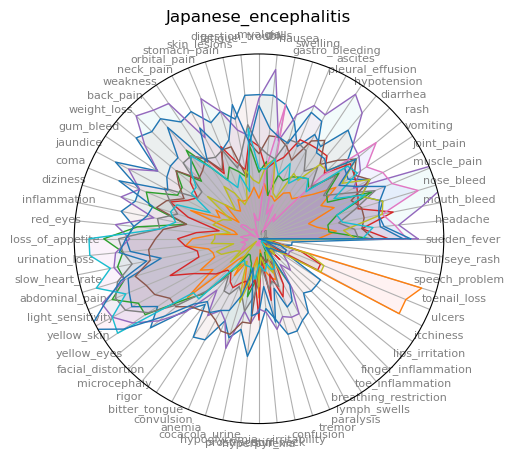

CPU times: user 3.94 s, sys: 688 ms, total: 4.63 s
Wall time: 3.91 s


In [10]:
%%time

# create a dataframe containing sums of features 
diseaseprofile_df=pd.DataFrame()
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    diseaseprofile_df = diseaseprofile_df.append(sum_disease_df,ignore_index=True)
n=0

for disease in diseases:
    # number of variable
    categories=list(diseaseprofile_df)[0:]
    N = len(categories)
 
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=diseaseprofile_df.loc[n].values.flatten().tolist()
    values += values[:1]
    values
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot 
    ax = plt.subplot(111, polar=True)
 
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,1], ["0","1"], color="grey", size=7)
    plt.ylim(0,50)
 
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    # Fill area
    ax.fill(angles, values, color=colour[n], alpha=0.05)

    # Show the graph
    plt.title(disease)
    n=n+1
plt.show()

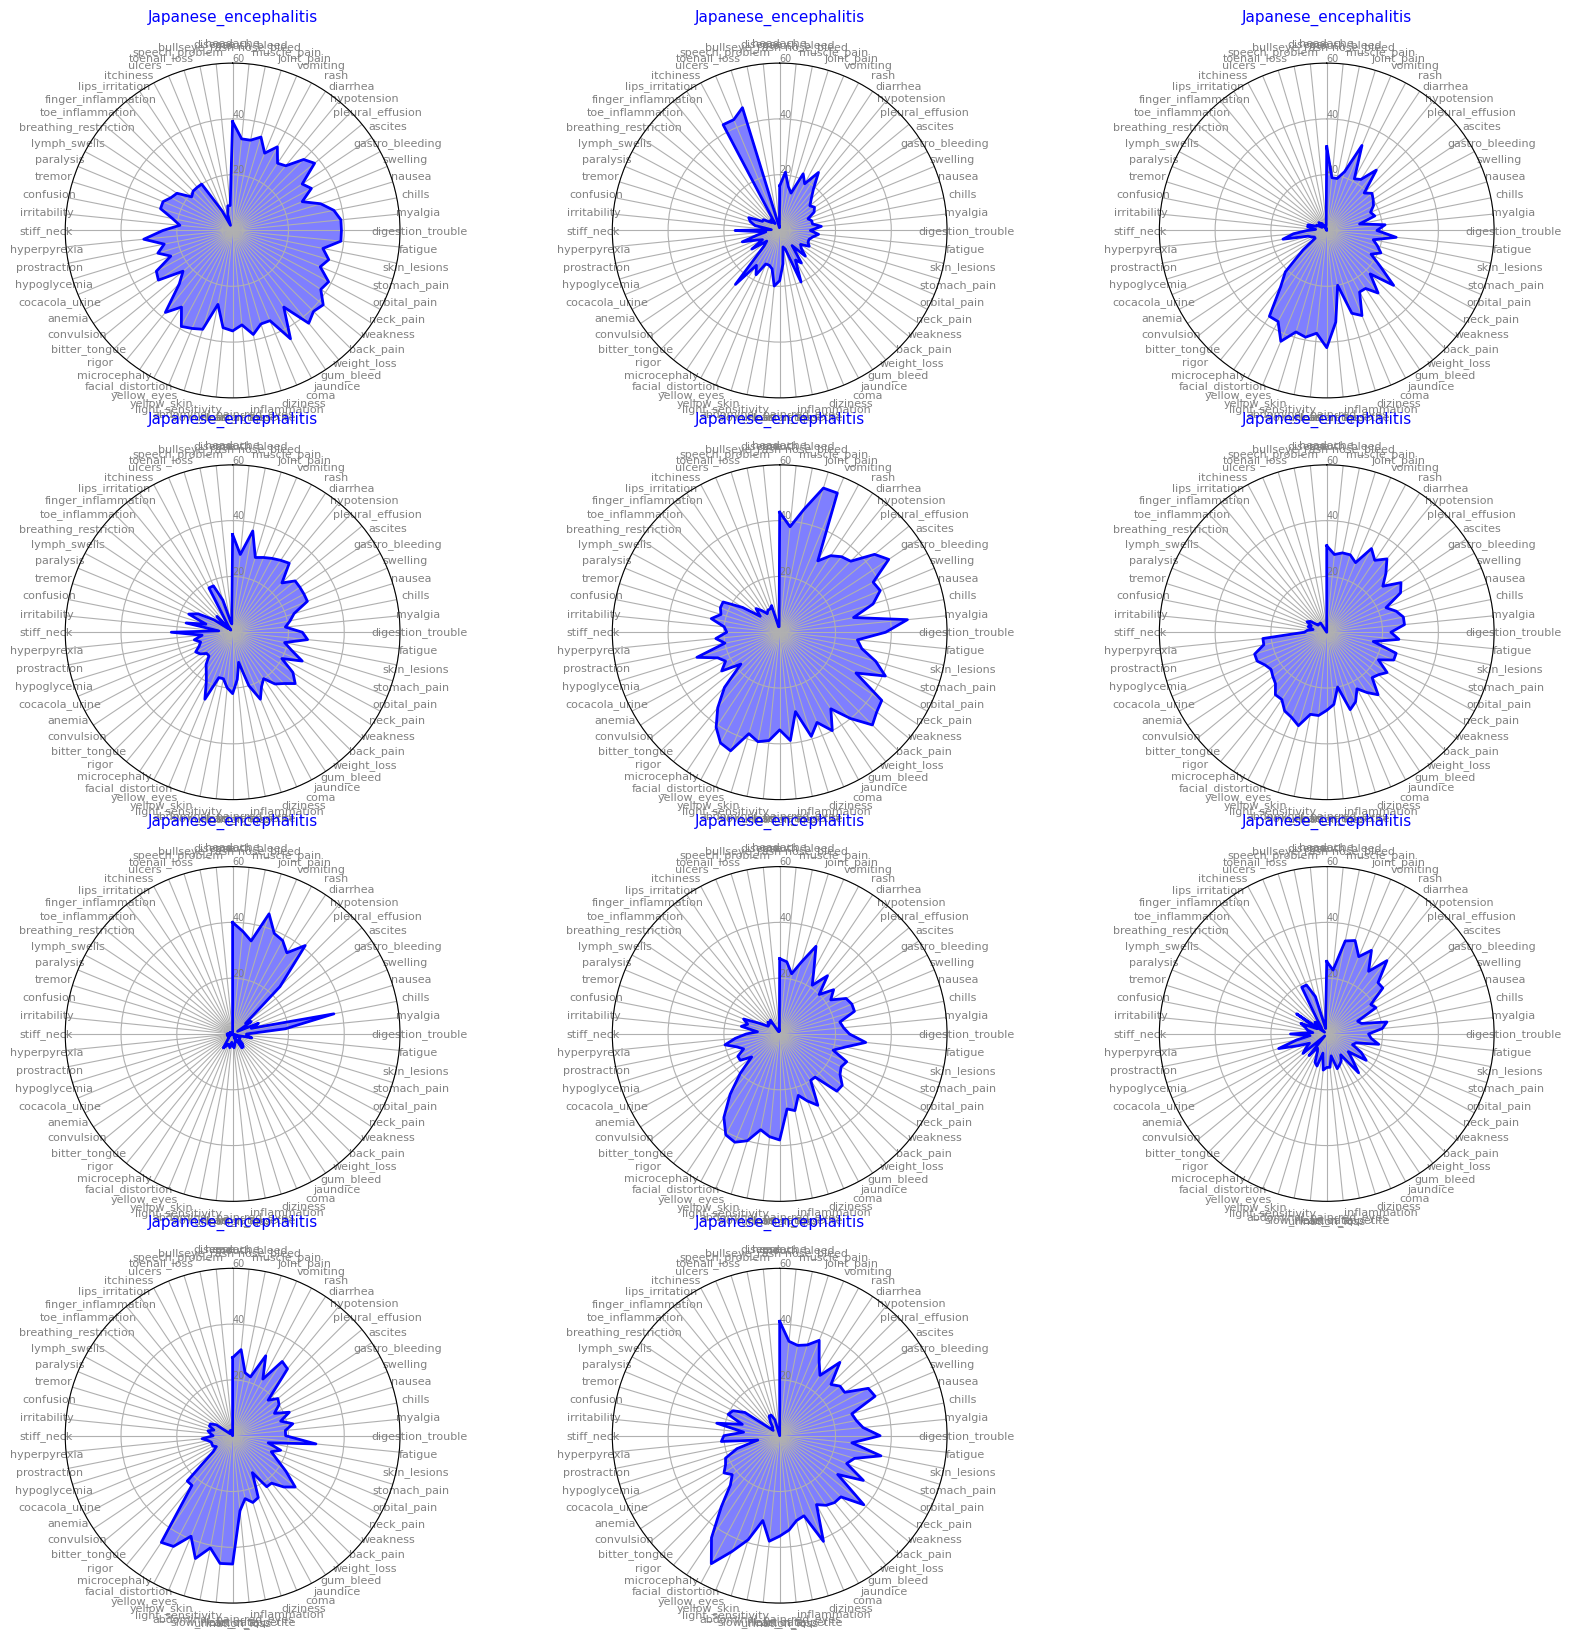

CPU times: user 15.1 s, sys: 1.27 s, total: 16.3 s
Wall time: 16.1 s


In [11]:
%%time

#grid for radar charts based on code at https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart

# create a dataframe containing sums of features 
diseaseprofile_df=pd.DataFrame()
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    diseaseprofile_df = diseaseprofile_df.append(sum_disease_df,ignore_index=True)
diseaseprofile_df['disease']=train_df['prognosis'].unique()

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(diseaseprofile_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    
    ax = plt.subplot(4,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
    plt.ylim(0,60)

    # Ind1
    values=diseaseprofile_df.loc[row].drop('disease').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='b', linewidth=2, linestyle='solid',alpha=1)
    ax.fill(angles, values, color=color, alpha=0.5)

    # Add a title
    plt.title(disease, size=11, color=color, y=1.1)

# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(20,20))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(diseaseprofile_df.index))
 
# Loop to plot
for row in range(0, len(diseaseprofile_df.index)):
    make_spider( row=row, title='disease '+diseaseprofile_df['disease'][row], color='b')
plt.show()

# Heatmaps

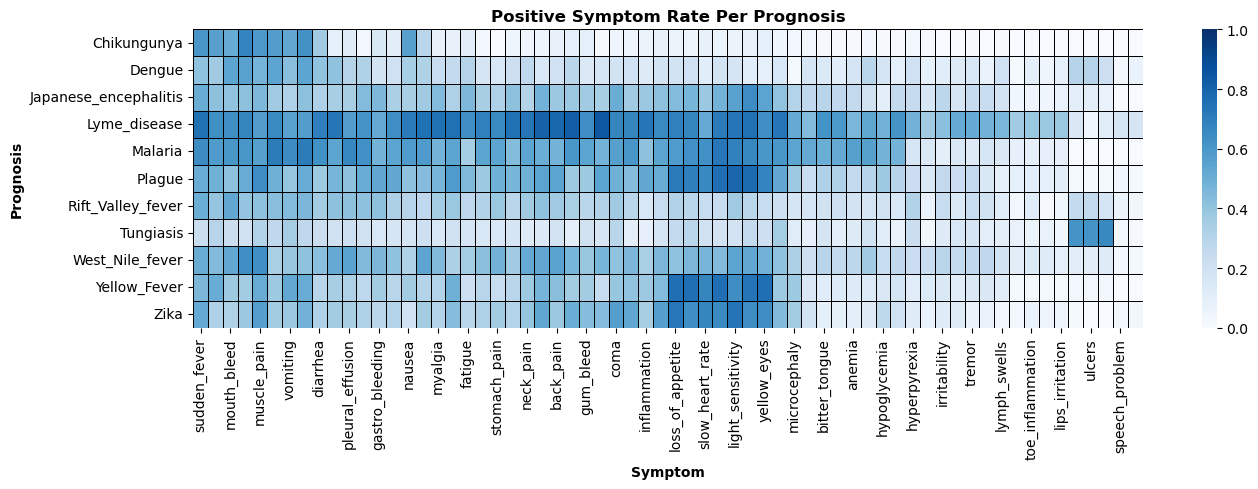

CPU times: user 1.11 s, sys: 327 ms, total: 1.44 s
Wall time: 950 ms


In [12]:
%%time

# from @keenanzhuo notebook https://www.kaggle.com/code/keenanzhuo/pss3e13-disease-prediction-for-n00bz

# Make a list of the symptoms for convenience
symptoms = list(train_df.drop(['id','prognosis'], axis=1).columns)

# Group by prognosis and get sums (all the 1s) and total counts
df_dummy = train_df[symptoms+['prognosis']].groupby(by='prognosis').agg([sum, 'count'])

# Create new dataframe with the sum / count which is the fraction of positive symptoms
df_dummy2=pd.DataFrame()
for x in symptoms:
    df_dummy2[x] = df_dummy[(x, 'sum')] / df_dummy[(x, 'count')]

# Generate heatmap of symptoms for each prognosis
plt.figure(figsize=(14,5))
ax = sns.heatmap(df_dummy2, linecolor='black', linewidth='0.6', cmap="Blues", vmin=0, vmax=1)
ax.set_title('Positive Symptom Rate Per Prognosis', weight='bold')
ax.set_ylabel('Prognosis', weight='bold')
ax.set_xlabel('Symptom', weight='bold')    
plt.tight_layout()
plt.show()

# Symptoms for each case by disease

So far we have looked at cumulative results, comparing the number of total cases displaying signs of each symptom for each disease. This does not give us an indication of how many symptoms individuals had or the combinations of symptums individuals presented.

The following chart shows a plot for each disease where each column is a case of the disease and each row respresents a symptom, you can see that there is a high degree variability within cases. Some cases showing some symptoms others showing others.

This might suggest that prediction is going to be difficult.

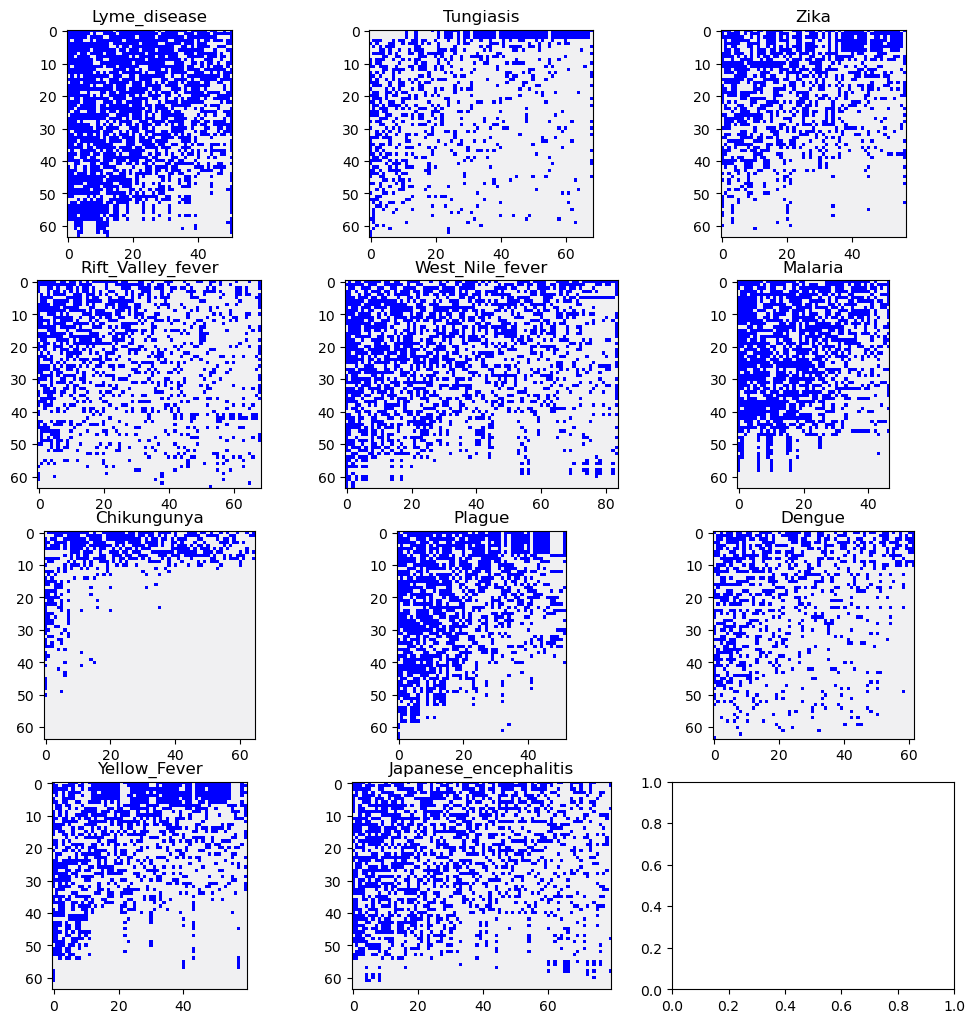

CPU times: user 1.79 s, sys: 228 ms, total: 2.02 s
Wall time: 1.66 s


In [13]:
%%time

# taken from @BELATI JAGAD BINTANG SYUHADA , https://www.kaggle.com/code/belati/vector-borne-disease-eda-why-our-model-sucks

def plot_row(df, axis):
    # Selecting the part of dataframe that is going to be displayed
    _df = (df.loc[df.prognosis == col])[1:]
    _df['cumulative'] = _df.sum(axis=1)[1:]
    
    # Sort the dataframes so the visualization will be better
    _df = _df.sort_values(by='cumulative', ascending=False).drop(columns=['cumulative'])
    columns = _df.sum()[:-1].sort_values(ascending=False).index.to_list()
    
    # Display the dataframe along with its details
    ax[axis].imshow(_df[columns].values.T, cmap=cm)
    ax[axis].set_title(col)
    #ax[axis].set_yticklabels(columns)
    #ax[axis].yaxis.set_major_locator(mticker.FixedLocator(range(64)))
    
def plot_prog(df, prognosis):
    # Creating figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Selecting the part of dataframe that is going to be displayed
    _df = _df.loc[df.prognosis == prognosis]
    _df['cumulative'] = _df.sum(axis=1)
    
    # Sort the dataframes so the visualization will be better
    _df = _df.sort_values(by='cumulative', ascending=False).drop(columns=['cumulative'])
    columns = _df.sum()[:-1].sort_values(ascending=False).index.to_list()
    
    # Display the dataframe along with its details
    ax.imshow(_df[columns].values.T, cmap=cm)
    ax.set_title(prognosis)
    #ax.set_yticklabels(columns)
    #ax.yaxis.set_major_locator(mticker.FixedLocator(range(64)))

fig, ax = plt.subplots(4,3, figsize=(10, 10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
ax = ax.flatten()
cm = sns.light_palette('blue', as_cmap=True)

for i, col in enumerate(train_df.prognosis.unique()):
    
    plot_row((train_df.drop(['id'], axis=1)), i)
plt.show()

# Correlation of Features

Lets look at the correlation of features next. The dataset contains 64 features, each relating to a separate symptoms associated with disease. Any correlations between features looking at the whole dataset would indicate that those symptoms always go hand in hand (or are never seen together), no matter what the disease. As the dataset contains information on all 11 disease, each with it's own set of symptoms, its unlikely that we'll see any correlations.

If we filter out individual diseases within the dataset its more likely that we will start to see correlations within the data.

CPU times: user 1.73 s, sys: 428 ms, total: 2.16 s
Wall time: 1.68 s


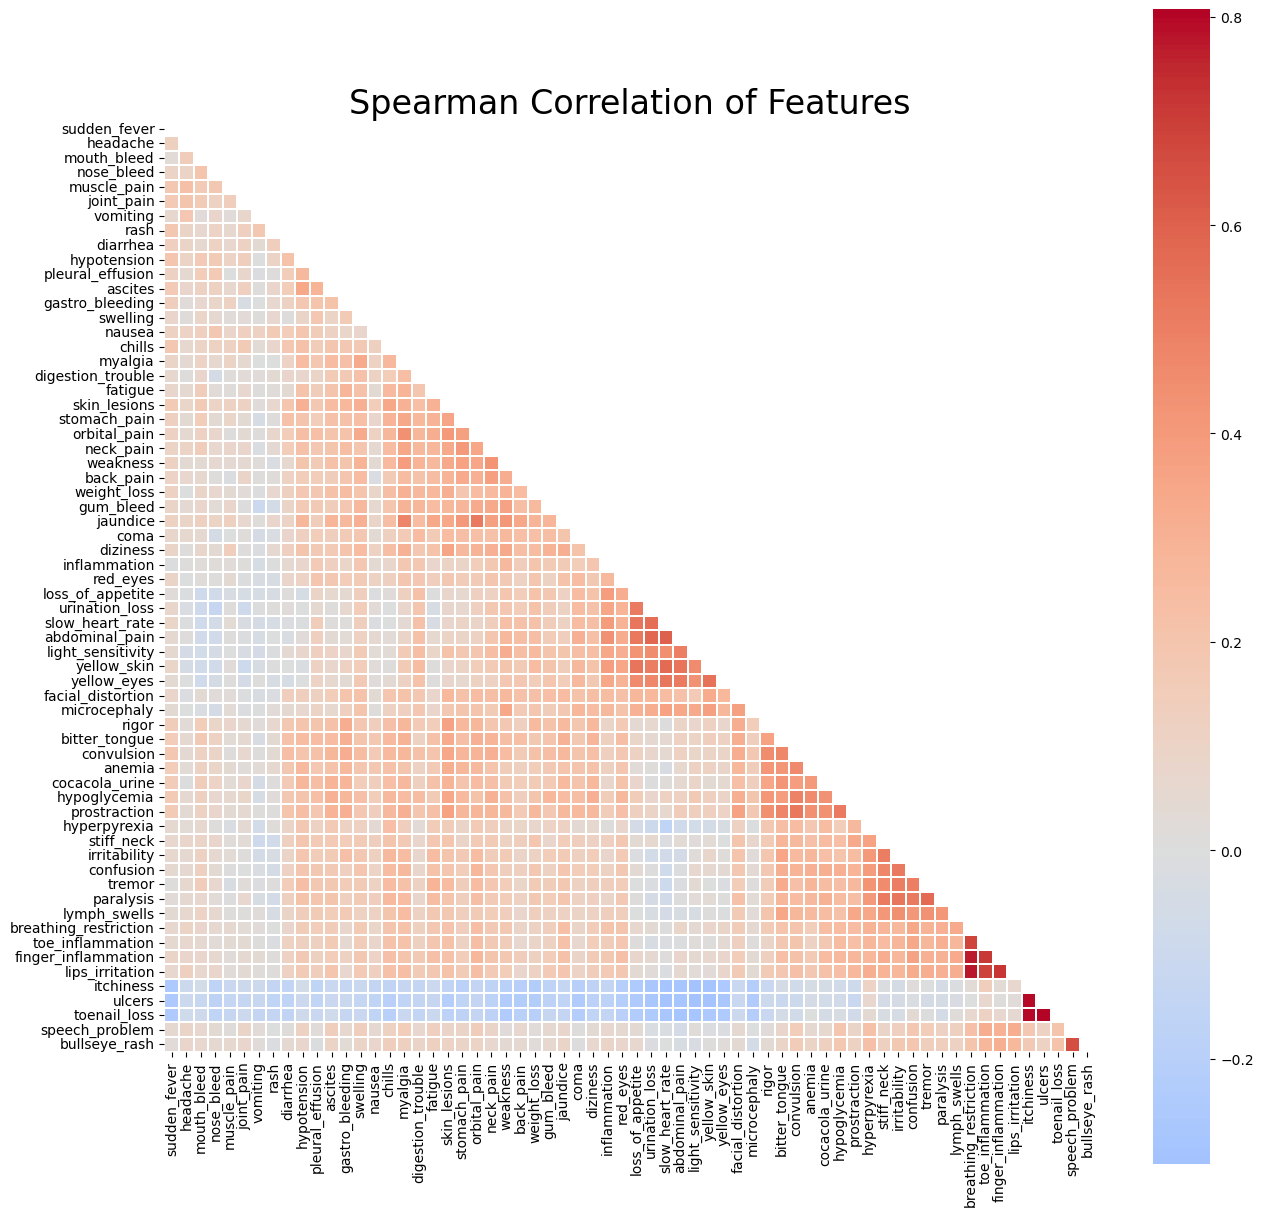

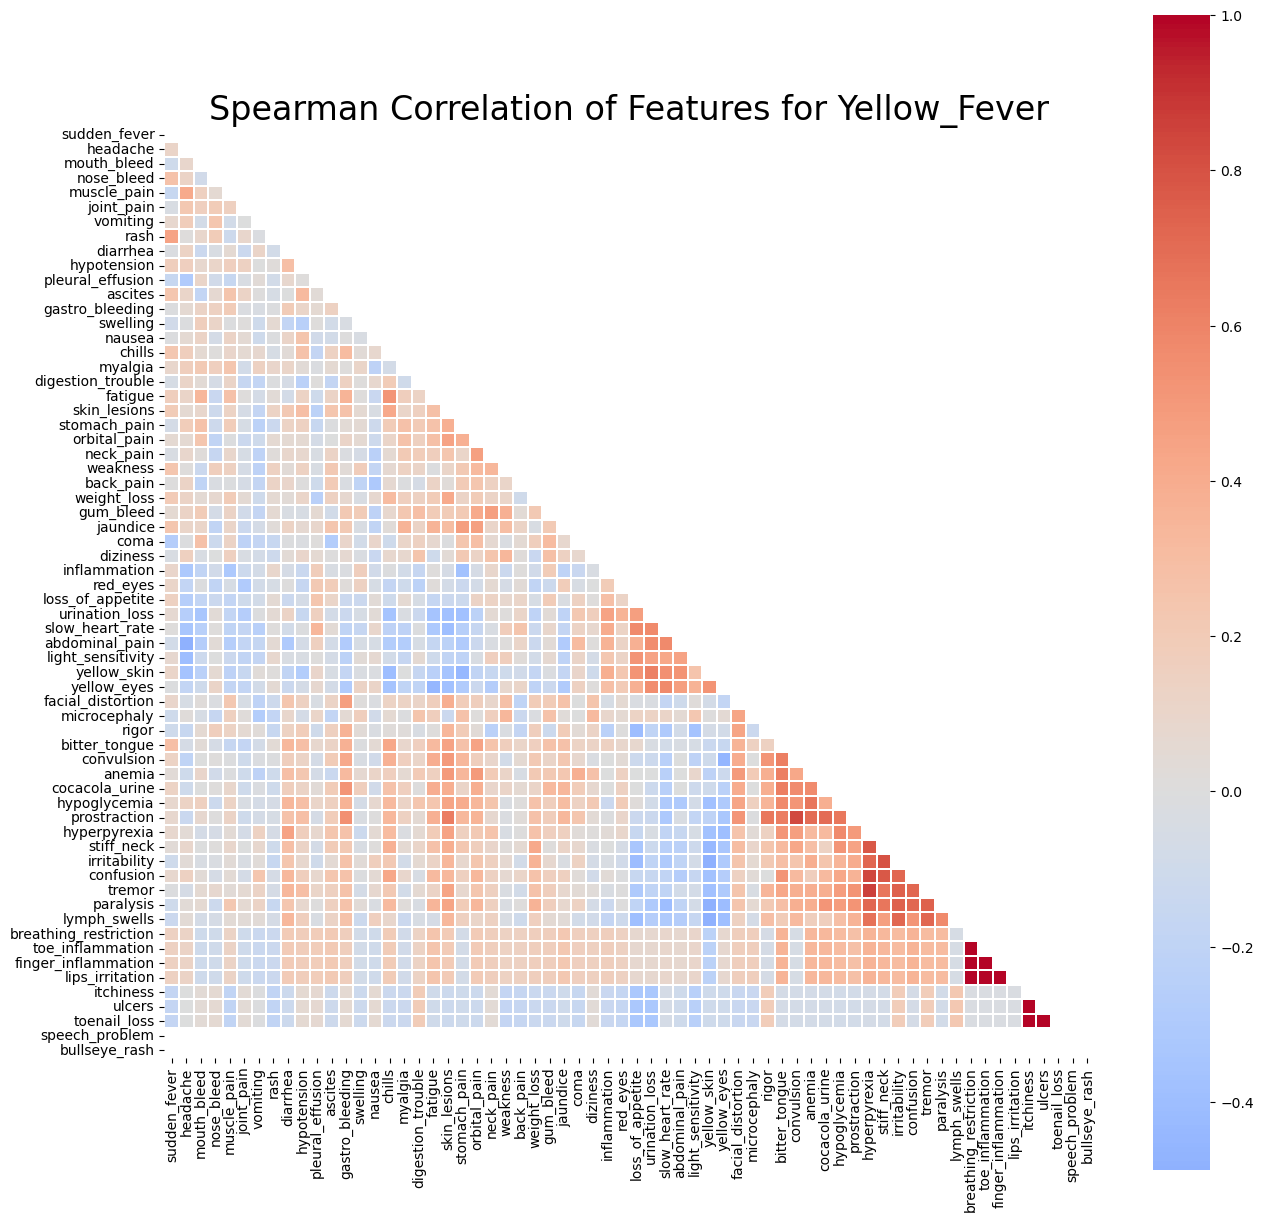

In [14]:
%%time

features = (train_df.columns)[1:-1] #select columns to be used
correlation_matrix = train_df[features].corr(method="spearman") #create correlation matrix

# create heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=True,
    ax=ax,
    annot=False,
)
ax = ax.set_title("Spearman Correlation of Features", fontsize=24) 


disease="Yellow_Fever"#input('Print enter name of disease you are interested in') or "Maleria"
disease_df = (train_df[train_df['prognosis']==disease]) #    mdailypowerdf1=mdailypowerdf[mdailypowerdf['Weekday']==int(filterday)]

correlation_matrix = disease_df[features].corr(method="spearman") #create correlation matrix
# create heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=True,
    ax=ax,
    annot=False,
)
title=str("Spearman Correlation of Features for " + disease)
ax = ax.set_title(title, fontsize=24) 

In [15]:
%%time
#g = sns.pairplot(train_df, palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
#g.set(xticklabels=[])
#plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


# Prepare for modelling

In [16]:
%%time

le = LabelEncoder()
train_df2=train_df.copy()
train_df2["prognosis"] = le.fit_transform(train_df2["prognosis"])

y=train_df2['prognosis']
X = train_df.drop('prognosis', axis=1)

#split test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

CPU times: user 5.71 ms, sys: 0 ns, total: 5.71 ms
Wall time: 6.31 ms


# Baseline submission with GradientBoostingClassifier

In [17]:
%%time

#model data
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
#assess accurancy of model
print("Accuracy: {}".format(clf.score(X_test, y_test)))
#generate predictions
Submission2=clf.predict(test_df)
#print(Submission2)
Submission3=list(le.inverse_transform(Submission2))
Submission = pd.read_csv('/kaggle/input/playground-series-s3e13/sample_submission.csv')
Submission.to_csv('submission.csv', index=False)
Submission['prognosis']=Submission3
Submission.to_csv('submission.csv', index=False)

Accuracy: 0.27699530516431925
CPU times: user 2.23 s, sys: 3.96 ms, total: 2.23 s
Wall time: 2.24 s


# Compare the profile of the predicted prognosis with the profile of training data

We can take a look at how the prognosis of our predictions compares to the profiles of the traing data to get an idea of how well our prdictions match the real data.

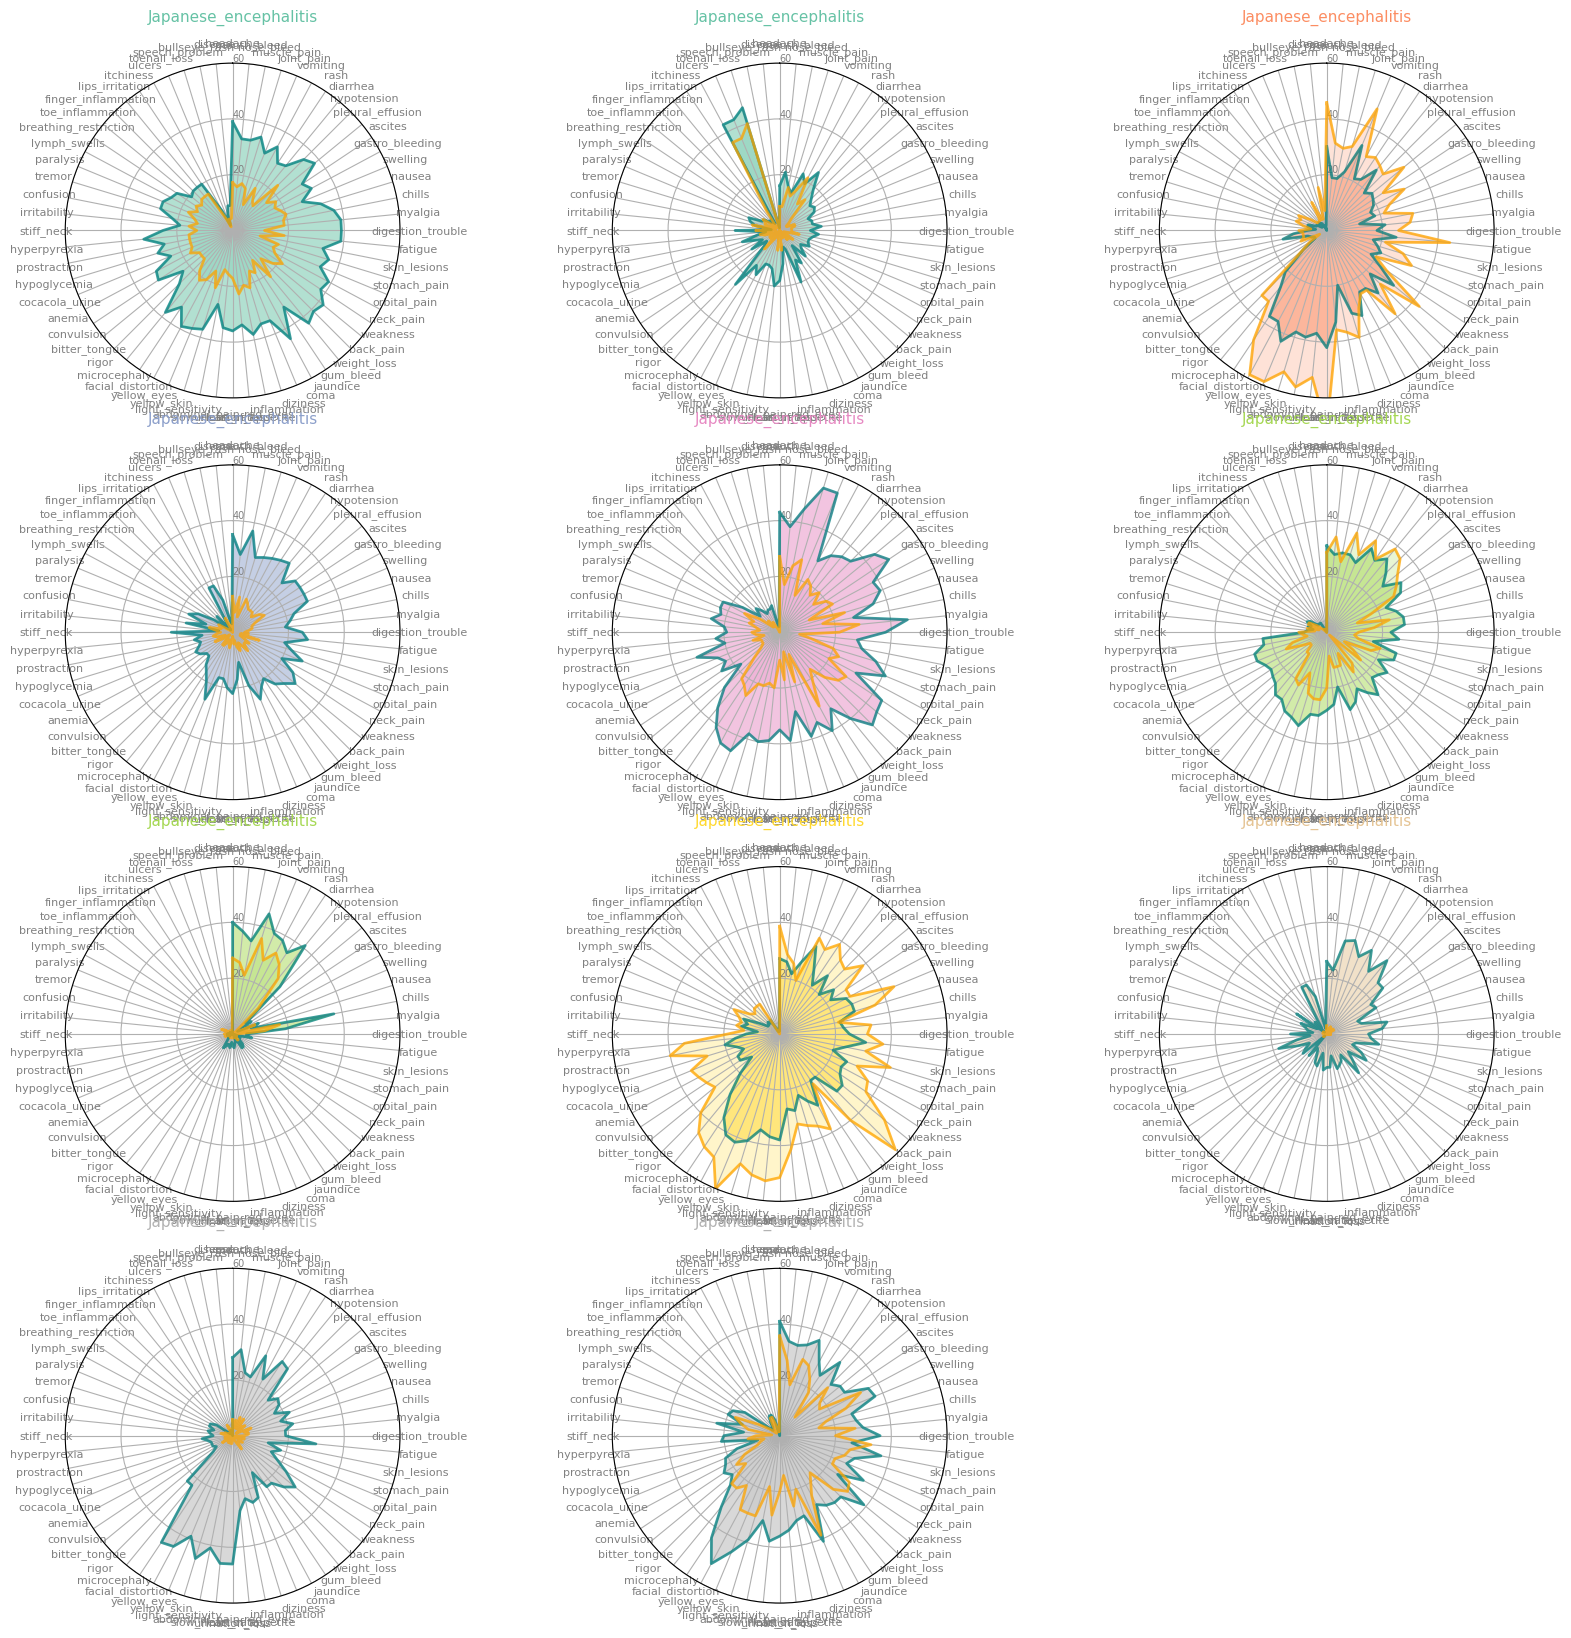

In [18]:
#grid for radar charts based on code at https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart

test_df['prognosis']=Submission3

# create a dataframe containing sums of features 
diseaseprofile_df=pd.DataFrame()
diseaseprofile_df2=pd.DataFrame()
for disease in diseases:
    disease_df=train_df[train_df['prognosis']== disease]
    diseasecount=disease_df.shape[0]
    sum_disease_df=((disease_df).sum(axis=0)[1:-1])
    diseaseprofile_df = diseaseprofile_df.append(sum_disease_df,ignore_index=True)
    disease_df2=test_df[test_df['prognosis']== disease]
    diseasecount2=disease_df2.shape[0]
    sum_disease_df2=((disease_df2).sum(axis=0)[1:-1])
    diseaseprofile_df2 = diseaseprofile_df2.append(sum_disease_df2,ignore_index=True)
diseaseprofile_df['disease']=train_df['prognosis'].unique()
diseaseprofile_df2['disease']=train_df['prognosis'].unique()

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(diseaseprofile_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    
    ax = plt.subplot(4,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60], ["20","40","60"], color="grey", size=7)
    plt.ylim(0,60)

    # Ind1
    values=diseaseprofile_df.loc[row].drop('disease').values.flatten().tolist()
    values += values[:1]
    values2=diseaseprofile_df2.loc[row].drop('disease').values.flatten().tolist()
    values2 += values2[:1]
    values2= [element * 1.43 for element in values2]
    ax.plot(angles, values, color='teal', linewidth=2, linestyle='solid',alpha=0.75)
    ax.fill(angles, values, color=color, alpha=0.5)
    ax.plot(angles, values2, color='orange', linewidth=2, linestyle='solid',alpha=0.75)
    ax.fill(angles, values2, color=color, alpha=0.25)

    # Add a title
    plt.title(disease, size=11, color=color, y=1.1)

# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(20,20))

 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(diseaseprofile_df.index))
 
# Loop to plot
for row in range(0, len(diseaseprofile_df2.index)):
    make_spider( row=row, title='disease '+diseaseprofile_df['disease'][row], color=my_palette(row))

## Comments on Baseline submission, 

The baseline submission scored 0.185 which is a relatively low score but it was a randomly selected classifier with no parameter tuning and no feature engineering, so we should be able to build on that score.

We can see from the visual that our prediction for some diseases like Zika fit the training data quite closely, others like Yellow fever are not a very good fit.

## Coming Next!

Hopefully you will have found this notebook of interest, but its far from finished, over the next couple of weeks I intend to look at other classifiers and improve on the baseline resuls, So please checkback later!

# Credit where credits due

Kudos to the playground team at Kaggle for providing the competition and data, and to all the participants for their contributions to the community.

@sergiosaharovskiy (https://www.kaggle.com/sergiosaharovskiy) has created a really thorogh EDA with Submission https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e13-2023-eda-and-submission

@keenanzhuo (https://www.kaggle.com/keenanzhuo) has a great step by step notebook with VDA and modelling https://www.kaggle.com/code/keenanzhuo/pss3e13-disease-prediction-for-n00bz

The grid for the radar charts was based on code at https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart